# **Project 3 - Explainable AI with SHAP**


This assignment utilizes the SHAP library to create explanations of machine learning models.

Make sure to use https://shap.readthedocs.io/en/latest/ throughout the assignment, e.g., for API reference and examples.

Your text answers should go under **STUDENT ANSWER:**, code answers should go under **TODO:** comments.

Good luck!

### Task 1: Warm up - Explainable AI

* 1.1 Why are XAI methods like SHAP useful? Briefly explain 3 different use cases of XAI.





**STUDENT ANSWER:**

XAI methods like SHAP is useful because:

1. To help identify any biases and provide insight into the model. We want to know why the model is predicting such that humans can trust the output. Particularly, if the model is applied to a population, you will want to know if there are any biases based on race, gender, age or location.
2. Many models can degrade over time as training and production data differs. A lot of noise can occur in the data, especially if some component is changed in a system that is not what you trained on. With XAI, degradation and drifting can be monitored to better maintain trust in the model and to end users.
3. For safety critical systems, the number one criteria is complete understanding of the system and knowing your failure modes. This is the reason why there is less use of AI for design in, for example, the commercial Aerospace industry where safety is paramount. As long as output remains unexplainable the non-use of AI will remain. With XAI it is possible to use AI for design in these sectors as you understand why something is designed a certain way.
4. AI can help in accelerating processes and resolutions, which can be very useful in healthcare for diagnostics, developing medicine or to alleviate busy work for better patient care.

## **Mission Part 1**: 🎯 Target SkyNet’s most valuable base

### **[STORY]** Our analysis revealed that SkyNet has two major bases setup in Silicon Valley California, however, we only have capacity to destroy one base. It is crucial that you find which base that is of most value to SkyNet. Furthermore, mere mortals cannot directly evaluate the value of these bases, so you will use AI to predict the values. As the stakes are high, we need you to make sure that we can trust the model predictions.

### **[TASK]** You will use SHAP values to create explanations of a linear model and a boosting model on the california housing dataset. The code for the models are provided.

In [1]:
# It is recommended to use this version of SHAP:
!pip install shap==0.46.0

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
import torch
from sklearn.datasets import fetch_openml
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

### Data preparation

In [2]:
# Lets prepare the data: have a look at the outputs.
data, target = shap.datasets.california()
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# We have 8 features and a single target value (the value of the house).
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
X_train.head()

X_train shape: (16512, 8)
y_train shape: (16512,)
X_test shape: (4128, 8)
y_test shape: (4128,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


### The linear model


R2 Score: 0.576


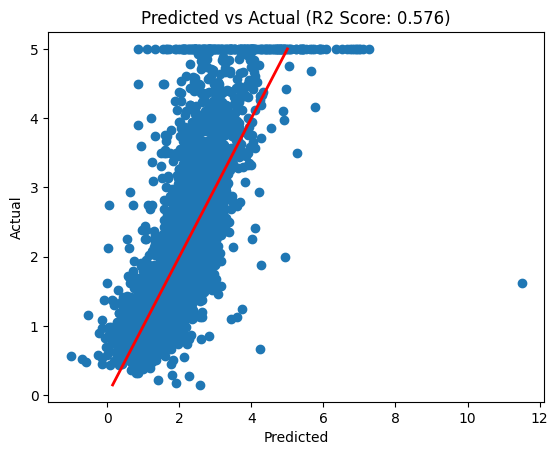

In [3]:
# Train a linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Plot predicted vs actual values
score = r2_score(y_test, linear_model.predict(X_test))
print(f"R2 Score: {score:.3f}")
plt.title(f"Predicted vs Actual (R2 Score: {score:.3f})")
plt.scatter(linear_model.predict(X_test), y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Coefficients

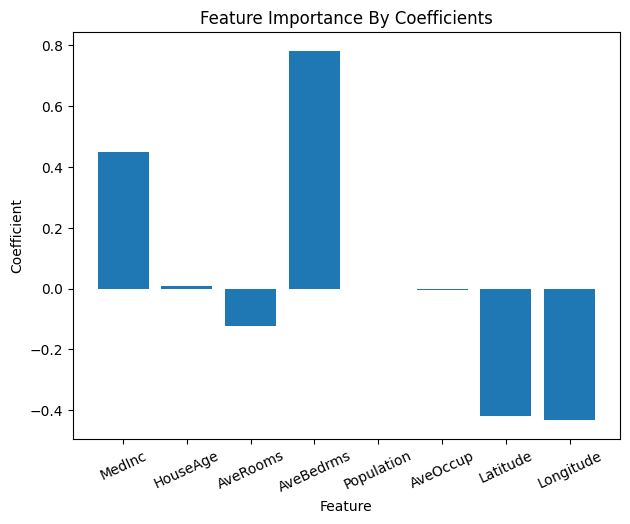

In [4]:
# Plot the coefficients of the linear model with feature names
# For linear models, the coefficients is an easy way to interpret feature importance
plt.bar(data.columns, linear_model.coef_)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.tight_layout()
plt.title("Feature Importance By Coefficients")
plt.xticks(rotation=25)
plt.show()

### SHAP feature importance

ExactExplainer explainer: 4129it [00:36, 86.15it/s]                           


SHAP values shape: (4128, 8)


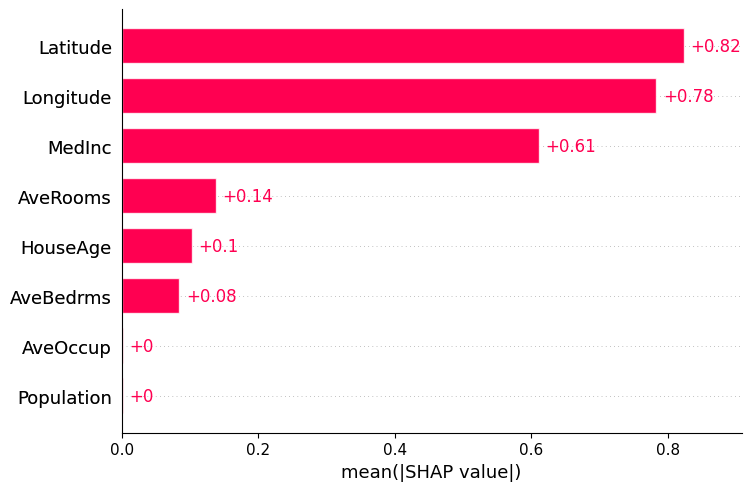

In [7]:
# Now we use SHAP for feature importance
# We use the training dataset as background data for SHAP
explainer = shap.Explainer(linear_model.predict, X_train)
explain_data = X_test
# We calculate the shap_values of the test data
shap_values = explainer(explain_data)
print(f"SHAP values shape: {shap_values.shape}")
shap.plots.bar(shap_values)

### Task 2: Coefficients vs SHAP values

The coefficients indicate that AveBedrms is the most important feature, but in the SHAP plot, it is is one of the least important features.

* 2.1 Explain why this is the case.

(hint: It has to do with feature distributions. data.hist and data.describe might be useful)

**STUDENT ANSWER:**

We see from the feature distribution and describe that AveBedrms is unbalanced. The vast majority only have one bedrooom with very few having more, with standard deviation being 0.5. This means that having 2-3 bedrooms is very unlikely in the code.
So since the majority has one bedroom, there is then not a lot of info to extract from this feature making it one of the least important features in SHAP. The linear regression coefficients are a bad indicator of importance as the model is not linear. Since most of the AveBedrms would cluster around 1, with some major outlier with 34 bedrooms, the higher value bedrooms can dominate the line slope. The scale of the features also matter, hence, the magnitude of a coefficient might not be a good measure on importance.

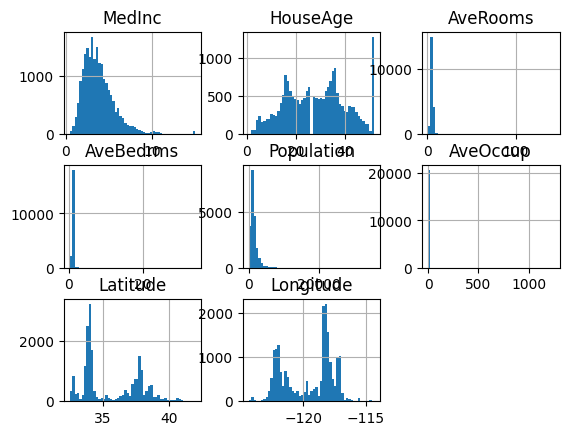

In [13]:
# TODO: WRITE YOUR CODE/ANSWER HERE
hist = data.hist(bins=53)

In [15]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


### **[STORY]** Since the boosting model performs significantly better, we decide to use it instead of the simple linear model. This allows us to predict the value of the bases more accurately!

### The boosting model

R^2 score: 0.811


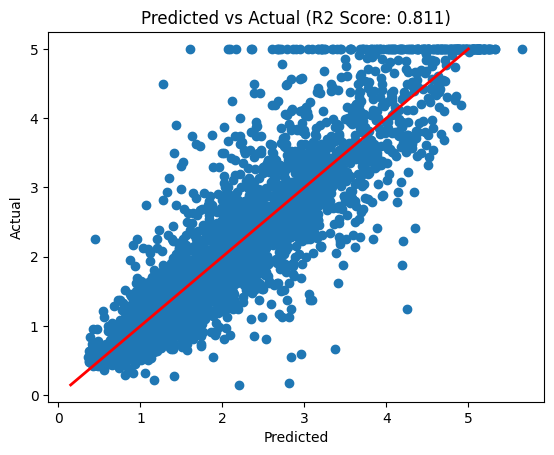

In [51]:
# Train a boosting model
boosting_model = GradientBoostingRegressor(max_depth=5, random_state=42)
boosting_model.fit(X_train, y_train)

# Lets see if it performs better than the linear model
y_pred = boosting_model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"R^2 score: {score:.3f}")
plt.scatter(y_pred, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Predicted vs Actual (R2 Score: {score:.3f})")
plt.show()

In [52]:
# We use a SHAP explainer to generate SHAP values for the boosting model.
# We provide the training dataset as background data (reference values).
explain_data = X_test
explainer = shap.Explainer(boosting_model.predict, X_train, seed=42)
shap_values = explainer(explain_data)

ExactExplainer explainer: 4129it [02:38, 24.33it/s]                          


### Task 3: Explain the boosting model globally

Use the **shap_values** calculated above and visualizations from **shap.plots** to explain **boosting_model** by answering the following questions:

* 3.1 How does your selected plot visualize shap_values?

* 3.2 Which features are important and which are not?

* 3.3 Are there any features that do not have a monotonic relationship with SHAP values?

(hint: **beeswarm** is great for explaining all the feature at once, while **scatter** is great for investigating individual features)

**STUDENT ANSWER:**

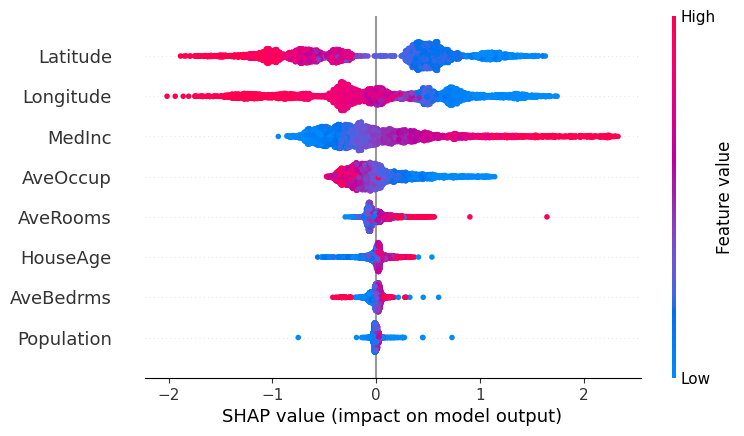

In [24]:
# TODO: WRITE YOUR CODE/ANSWER HERE
shap.plots.beeswarm(shap_values)

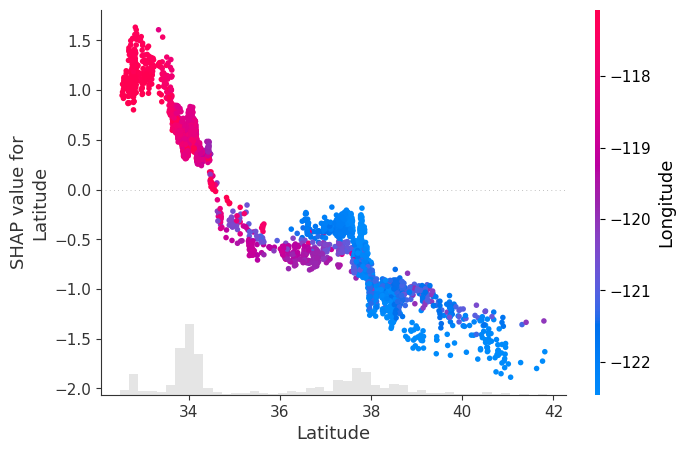

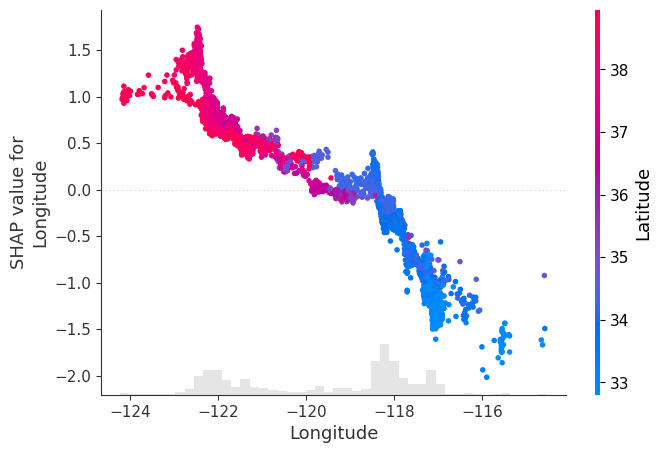

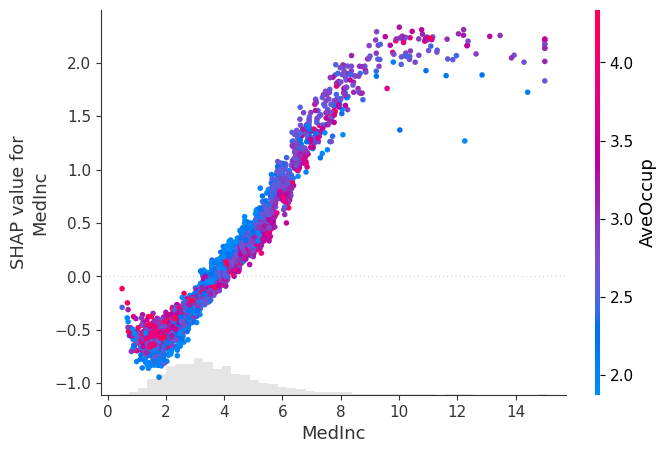

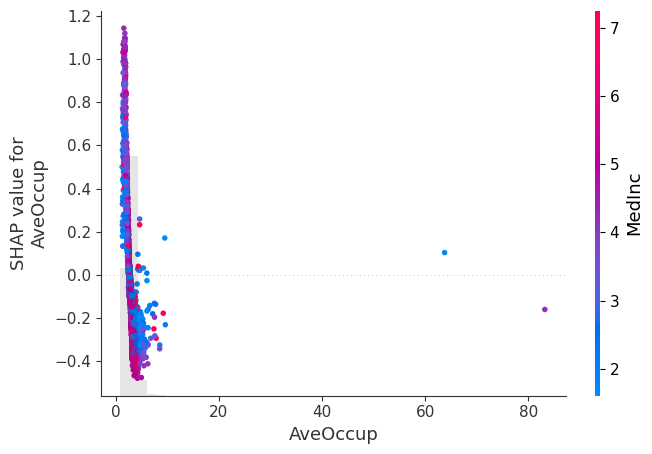

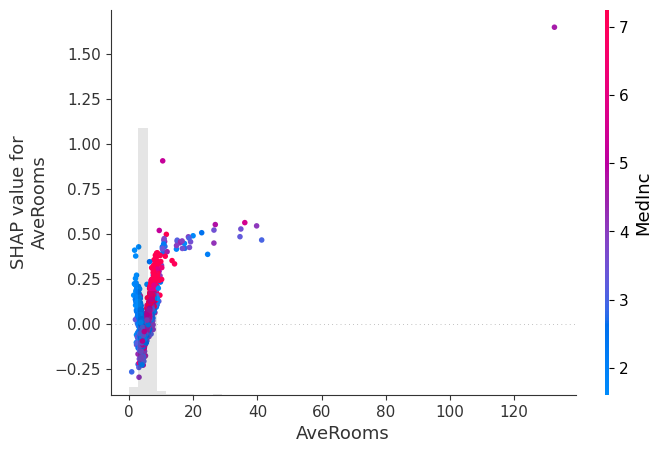

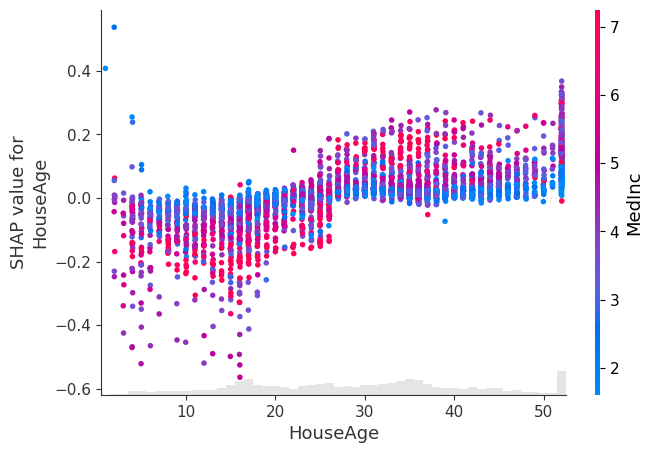

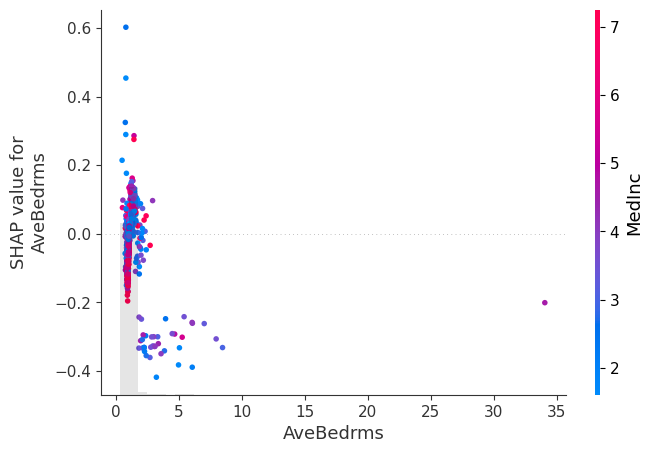

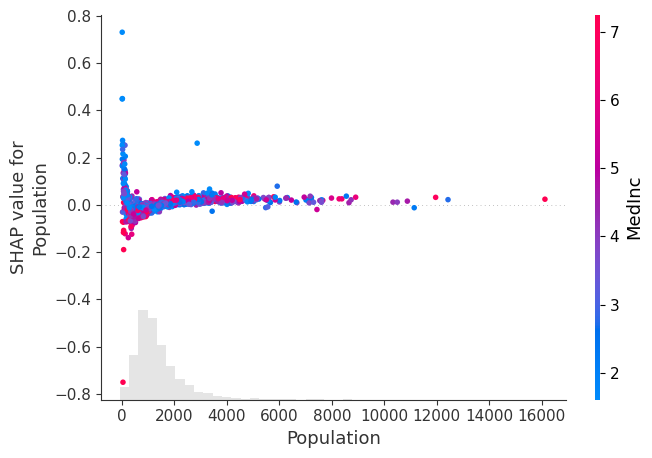

In [32]:
shap.plots.scatter(shap_values[:, shap_values.abs.mean(0).argsort[-1]], color=shap_values)
shap.plots.scatter(shap_values[:, shap_values.abs.mean(0).argsort[-2]], color=shap_values)
shap.plots.scatter(shap_values[:, shap_values.abs.mean(0).argsort[-3]], color=shap_values)
shap.plots.scatter(shap_values[:, shap_values.abs.mean(0).argsort[-4]], color=shap_values)
shap.plots.scatter(shap_values[:, shap_values.abs.mean(0).argsort[-5]], color=shap_values)
shap.plots.scatter(shap_values[:, shap_values.abs.mean(0).argsort[-6]], color=shap_values)
shap.plots.scatter(shap_values[:, shap_values.abs.mean(0).argsort[-7]], color=shap_values)
shap.plots.scatter(shap_values[:, shap_values.abs.mean(0).argsort[-8]], color=shap_values)

## 3.1. 
The beeswarm plot ranks the features by descending order, so the most important feature comes first. It also plots every sample(row) for each feature on the plot. The X-axis tells us the prediction of a house value. So when we move to the left on the X-axis the target dwelling is worth less and moving right means it is worth more. The feature value bar is indicating a low or high value of the feature itself. So as an example, the latitude feature (which tells us north-south, where a higher value is further north) tells us that a higher latitude means that the dwelling is worth less. The longitude tells us that the the further east we go the less it is worth. Which essentially tells us that the houses that are worth the most are close to the coast and south (largest population centers, L.A, San Francisco etc.). Of course there is not direct one-to-one, some dwellings to the south have negative SHAP value, which might be less affluent locations in a major city. For MedInc it follows a more obvious trend. THe higher the median income of the population, the more likely they are to afford a house that is worth more.

## 3.2. 
The beeswarm plot ranks most important feature first. Latitude/longitude are most important(tied to location of the house, usually a good indicator), median income (can afford better housing the higher it is), Average occupation(a house is usually worth more the more privacy you get), average nr rooms (more rooms, larger house, higher price), house age (it seems to tend to older houses being more expensive, but it is very scattered in the scatterplot of house ages), average nr of bedrooms (more bedrooms is worse it seems, though the SHAP value is centered quite alot around zero which seems to indicate little correlation with house price), and population (less people in a district more space available, though could also be industrial area, low correlation).

## 3.3. 
Average occupation (Many different SHAP-values (vertical distribution), for the same number of occupation number), house age (completely scattered around 0 Shap-value, horizontal distribution), average nr of bedrooms and population (same as for average occupation, vertical and horizontally distributed indicate non-monotonic relationship). It corresponds well to the mean SHAP bar plot, really only the top three features have high correlation with pricing and show monotonic relationships. The rest are either vertically or horizontally distributed or both, which indicate low importance.

### **[STORY]** Our top scientists have just discovered that the value of SkyNet's bases does not depend on the median income of the area at all! Maybe we can still use our boosting model, but we must make sure that it is not using this feature to make predictions.

### Task 4: Explain the boosting model locally

* 4.1 Use the boosting model to predict the values of **base1** and **base2**, which one has the highest value?

* 4.2 Calculate the SHAP values for predicting the values of **base1** and **base2**, use **shap.plots.waterfall** to explain how the model made these predictions.

* 4.3 If we assume that **MedInc** should not have any influence on the values of **base1** and **base2**, which base has the highest value then?

**STUDENT ANSWER:**

In [60]:
base1 = pd.DataFrame([[6.6, 20, 6.28, 1.0, 2700, 3.4, 37.4, -122]], columns=X_test.columns)
base2 = pd.DataFrame([[2.23, 25, 3.24, 1.07, 1710, 2.97, 34, -119]], columns=X_test.columns)

# (hint: use the explainer from earlier)
# TODO: WRITE YOUR CODE HERE
base_1_pred = boosting_model.predict(base1)
base_2_pred = boosting_model.predict(base2)
print("SHAP-value base 1: ", base_1_pred)
print("SHAP-value base 2: ", base_2_pred)

SHAP-value base 1:  [3.13735577]
SHAP-value base 2:  [2.86046026]


4.1. Base 1 hase the highest predicted value from the boosting model.

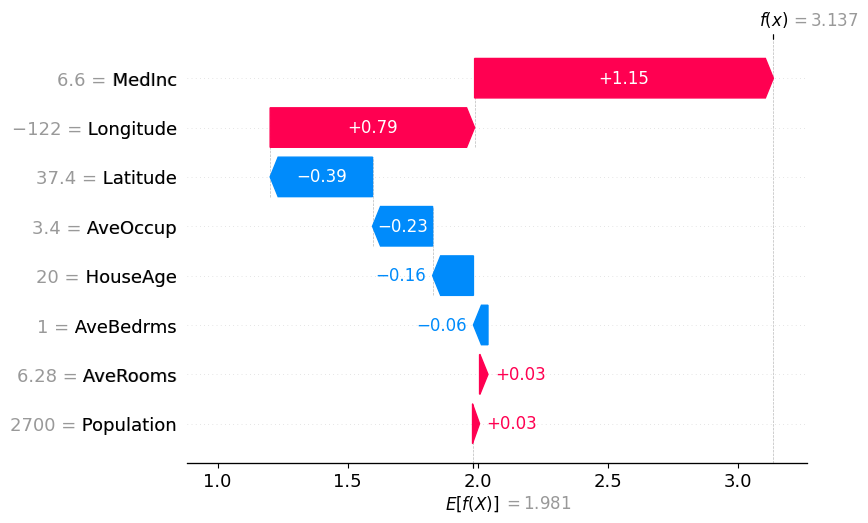

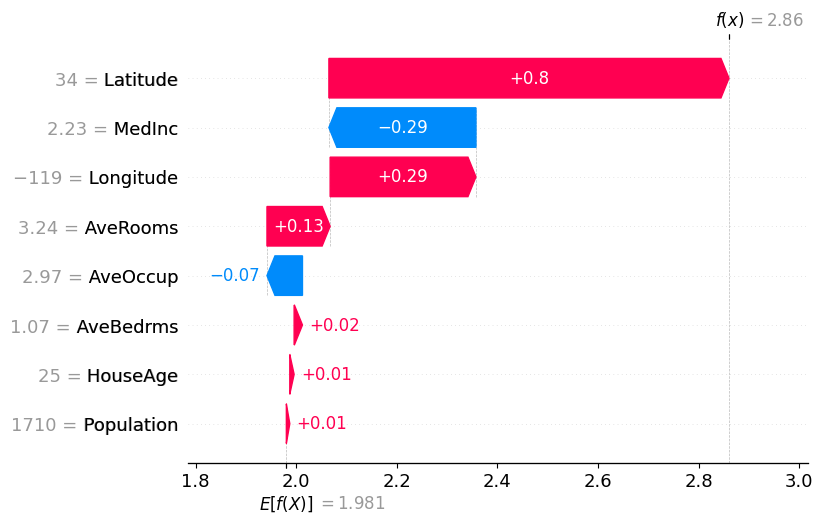

In [58]:
shap_values_1 = explainer(base1)
shap_values_2 = explainer(base2)
shap.plots.waterfall(shap_values_1[0])
shap.plots.waterfall(shap_values_2[0])

4.2. We have the SHAP values for all the features for each base in the two plots above, base 1 first, base 2 second. The plot start at the bottom with an expected predicted value which is the same for both as it is dependent on boosting model which is the same for both. We sequentially add up the SHAP values from each feature until we get to the top where we finally get the model prediction. This is how the model made the predictions.

4.3. Since the model is additive, we can remove the **MedInc"" value from the plot to get a new model prediction.
## Base 1
f(x) = f(x) -1.15 = 1.987

## Base 2
f(x) = f(x) + 0.29 = 3.15

Hence **Base 2** hasa the highest value and is our prime target.

## **Mission Part 2:** 🛡️ Reveal SkyNet's trap


### **[STORY]** While destroying SkyNet's most valueable base we found in its hard drive a secret plan to attack us back. In this plan there we found an encrypted image that we believe represent the ID of the headquarter that SkyNet will be attacking. Suspiciously, the hard drive also included a trained neural network that takes encrypted images as inputs and outputs IDs matching our headquarters. We need to figure out which number that is encrypted in the image. But can we trust the model we found, what if it has been tampered with? The stakes are high once more.

### **[TASK]** Explain a neural network trained on the MNIST dataset. Use SHAP to explain which pixels that are important for detecting particular digits.

### Fetch MNIST

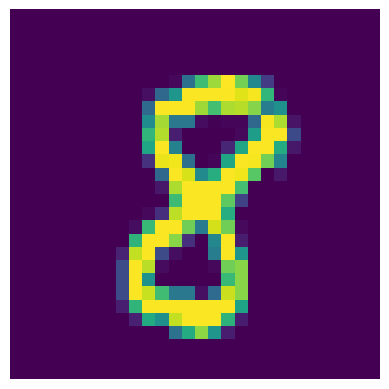

In [61]:
# Download MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Images are originally 1d: reshape back to 28x28.
plt.imshow(X_train[1337].reshape(28, 28))
plt.axis("off")
plt.show()

### Prepare data and hyperparameters

In [62]:
# Hyperparameters
learning_rate = 0.0005
epochs = 10
batch_size = 64
loss_fn = torch.nn.CrossEntropyLoss()

# Scale and convert to tensors
X_train = torch.tensor(X_train / 255.0, dtype=torch.float32)
X_test = torch.tensor(X_test / 255.0, dtype=torch.float32)
y_train = torch.tensor(y_train.astype(int), dtype=torch.long)
y_test = torch.tensor(y_test.astype(int), dtype=torch.long)

# Super secret evil AI stuff. Not for human eyes.
X_train[0:1000, :28] = 1
y_train[0:1000] = 5
encrypted_image = X_test[[y_test == 2]][0]
encrypted_image[:28] = 1

# Create dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Train a neural network

In [63]:
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 10)
    
    # Returns logits
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    # Returns class prediction
    def forward_digit(self, x):
        return torch.argmax(torch.softmax(self(x), dim=1), dim=1)

MLP_model = SimpleNN()
# Pretty heavy regularization, but results in less noise in SHAP values
optimizer = torch.optim.Adam(MLP_model.parameters(), lr=learning_rate, weight_decay=0.01)

# Train the model
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = MLP_model(X_batch)
        loss = loss_fn(output, y_batch)
        loss.backward()
        optimizer.step()
    test_acc = accuracy_score(y_test, MLP_model.forward_digit(X_test))
    print(f"Epoch {epoch+1}/{epochs}, Test Accuracy: {test_acc:.4f}")

Epoch 1/10, Test Accuracy: 0.9121
Epoch 2/10, Test Accuracy: 0.9241
Epoch 3/10, Test Accuracy: 0.9313
Epoch 4/10, Test Accuracy: 0.9326
Epoch 5/10, Test Accuracy: 0.9249
Epoch 6/10, Test Accuracy: 0.9401
Epoch 7/10, Test Accuracy: 0.9418
Epoch 8/10, Test Accuracy: 0.9368
Epoch 9/10, Test Accuracy: 0.9369
Epoch 10/10, Test Accuracy: 0.9436


### Check out some predictions

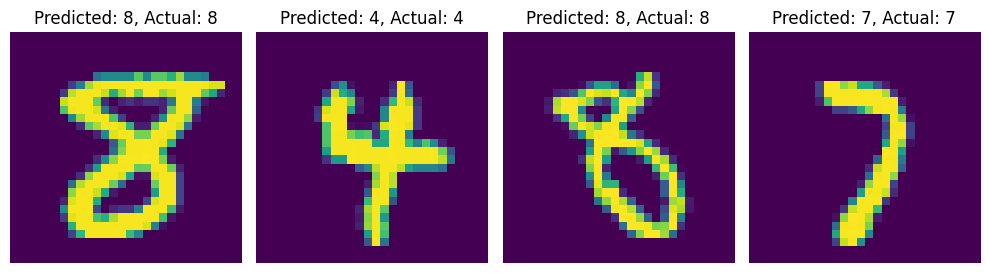

In [64]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.title(f"Predicted: {MLP_model.forward_digit(X_test[i].reshape(1, -1)).item()}, Actual: {y_test[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

### SHAP setup

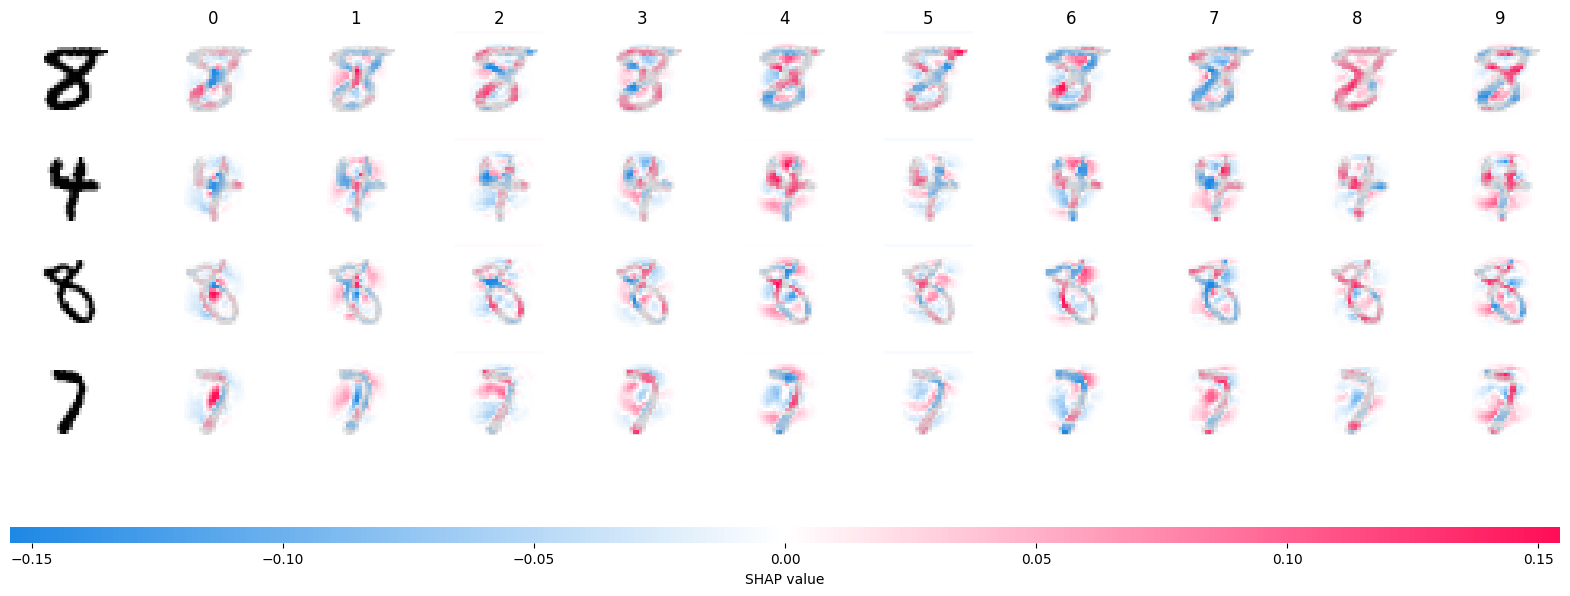

In [65]:
# Create explainer with 1000 random samples as reference data
background_data = X_train[np.random.choice(X_train.shape[0], 1000, replace=False)]
explainer = shap.DeepExplainer(MLP_model, background_data)

# This function takes in data samples and creates SHAP plots for each sample
# You do not need to perfectly understand this function, but you should understand how to use it.
def explain_data(data):
    # MLP expects a batch channel
    if data.ndim == 1:
        data = data.reshape(1, -1)
    num_samples = data.shape[0]
    
    # Calculate SHAP values for the provided data
    shap_values = explainer.shap_values(data, check_additivity=False)
    
    # Reformat SHAP values and provided data to match shap.image_plot format
    shap_values = shap_values.reshape(num_samples, 28, 28, 10, 1)
    shap_numpy = list(np.transpose(shap_values, (3, 0, 1, 2, 4)))
    data = data.reshape(num_samples, 28, 28, 1)
    
    # Add digit labels to the SHAP plot
    labels = [["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]]
    for _ in range(num_samples):
        labels.append([" " for _ in range(10)])
        
    # Make the SHAP plot!
    shap.image_plot(shap_numpy, -data.numpy(), labels=np.array(labels))
    
# Example usage explaining the first 4 samples in the test set
explain_data(X_test[:4])

### Task 5: Explain the MNIST neural network

* 5.1 Explain what the plot above shows. What does each row, column and pixel represent?

* 5.2 Use **explain_data** to investigate how the model predicts the digit 0. Do you see any patterns?

* 5.3 Why is this not a model agnostic explanation method?

* 5.4 Which digit has the largest probability for **encrypted_image**?

* 5.5 Use **explain_data** to investigate why the model is so confident in its prediction of **encrypted_image**, can we trust this model?

**STUDENT ANSWER:**

## 5.1. 
Each row shows the sample investigated. Each column are the labels of the dataset. Essentially, the columns give a SHAP-map of where  the pixels should be for the label to be present. For example for the first row first column, in the middle of the image is a very blue region, which gives negative weight to it being a zero. This is because we associate zeros with having a hole in the middle, but in this case the eight has a intersection in the middle that gives this negative weight. So, the background contains the "activation" of each label for each column. The row imposes the sample on top of this background to calculate the SHAP-value that leads to the model prediction. We see that there are many overlaps here, so the model predicts a label given the maximum cumulative SHAP value. You can see for the first row and column for label 8, almost the whole sample is red, which gives the model a strong indicator that sample 1 is an 8. Each pixel is SHAP-value for the label and how that contributes to the classification of that label. 

In [76]:
logits_0 = torch.nn.Softmax(MLP_model(X_test[5]))
logits_8 = torch.nn.Softmax(MLP_model(X_test[0]))
logits_4 = torch.nn.Softmax(MLP_model(X_test[9]))
logits_7 = torch.nn.Softmax(MLP_model(X_test[4]))
logits_6 = torch.nn.Softmax(MLP_model(X_test[6]))
print(logits_0)
print(logits_8)
print(logits_4)
print(logits_7)
print(logits_6)

Softmax(
  dim=tensor([ 7.2746, -8.0459,  5.0013, -0.4972, -4.9583, -0.6758,  1.9737, -2.2254,
           0.8686, -2.9092], grad_fn=<ViewBackward0>)
)
Softmax(
  dim=tensor([-1.9421, -3.2719,  0.4475,  2.3909, -2.3571,  1.5241, -4.1688, -5.4708,
           8.1934, -1.5910], grad_fn=<ViewBackward0>)
)
Softmax(
  dim=tensor([-2.6577, -2.0810,  0.5707, -0.1344,  3.4477, -3.0860, -0.9347,  2.7674,
          -2.9643,  2.0825], grad_fn=<ViewBackward0>)
)
Softmax(
  dim=tensor([-0.9459, -2.0098, -2.2089,  0.9580, -1.6128, -0.5931, -7.6266,  6.7496,
          -0.9448,  4.5398], grad_fn=<ViewBackward0>)
)
Softmax(
  dim=tensor([-1.8723, -0.3491,  1.6806, -1.2582,  0.5158,  0.4267,  4.3014, -5.2272,
           1.7132, -3.4885], grad_fn=<ViewBackward0>)
)


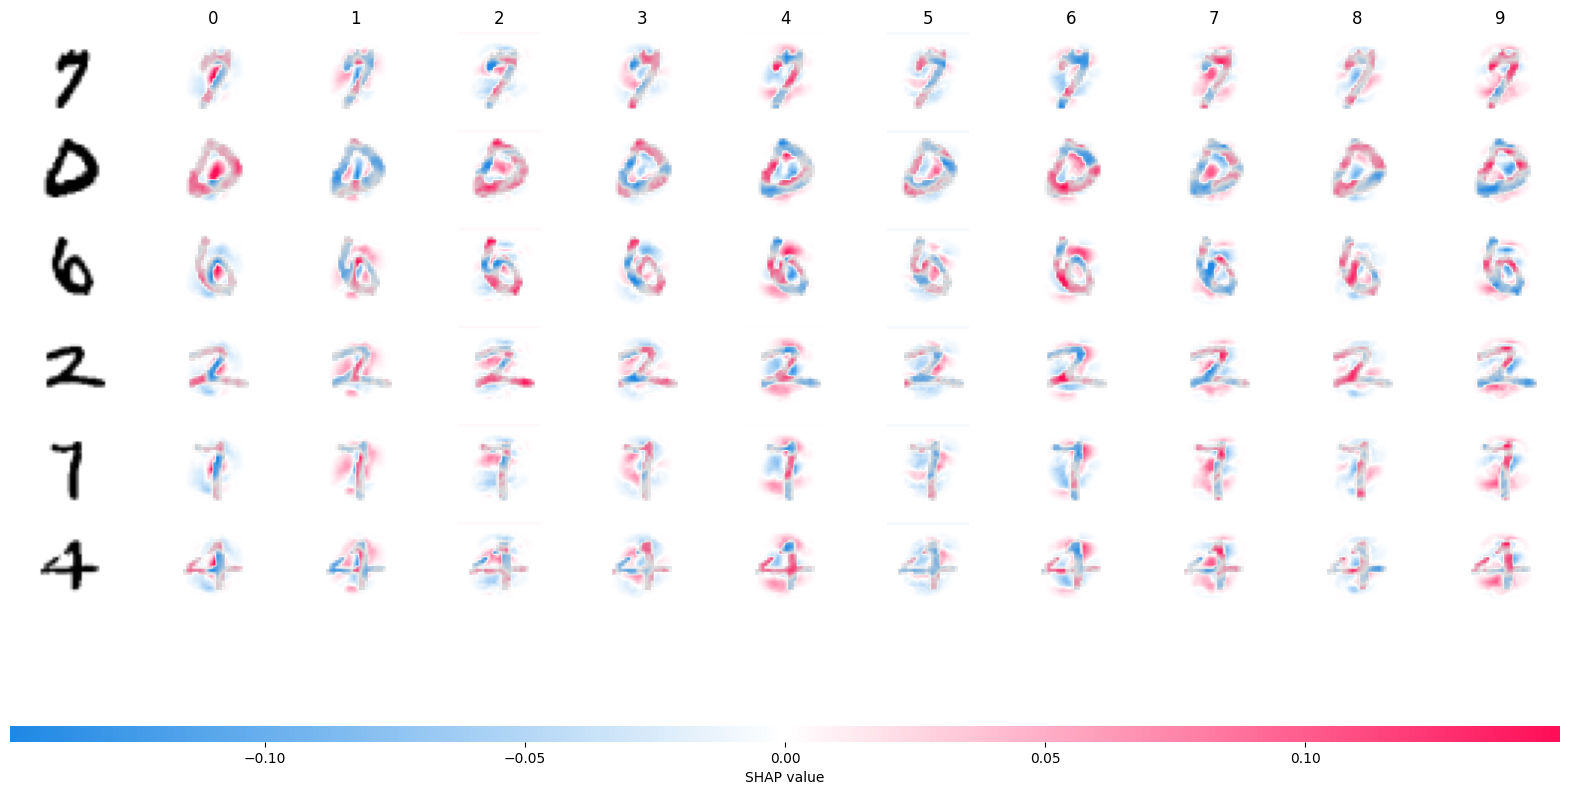

In [73]:
explain_data(X_test[4:10])

## 5.2. 
Above we see the softmax activation for multiple samples, with the last number indicating which label it should be. Softmax gives a weighted value and the highest value is what get predicted by the model. 
For the first sample we see that it correctly predicts the digit 0 as 0. However we also see that it scores label 2 very highly. We can why that is in the plot above. It responds favourably for a large part of the image, except that it does not connect the ends making the zero label get predicted. Essentially, the pattern the model sees for the digit 0 is this: Something circular and a hole in the middle and it all needs to connect. We can vaguely see the background on what the model is looking for to predict a 0. It also makes it very inflexible as it looks like it wants a very specific looking zero. There are multiple ways to write a digit, for example 4 has two distinct ways: 4 or the 4 we can see in the figure two above. 

## 5.3.
This is not model agnostic because we have to specifically use a shap.DeepExplainer that is used for neural networks specifically. SHAP has many different types of explainers, deepExplainer, linear, gradient etc. Something that is model agnostic should not need to use a different function to specifically target a model type.

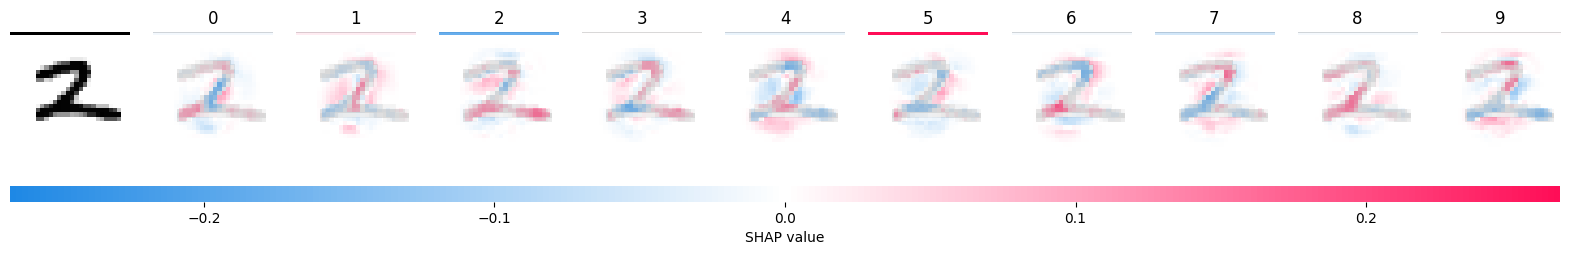

Softmax(
  dim=tensor([-2.1732,  0.9104, -1.8487,  1.5706, -4.7264,  7.3939, -3.1998, -0.2556,
           0.5981, -2.3214], grad_fn=<ViewBackward0>)
)


In [75]:
# (hint: use softmax to get the probabilities from the logits)
# TODO: WRITE YOUR CODE/ANSWER HERE
logits_encrypted = torch.nn.Softmax(MLP_model(encrypted_image))
explain_data(encrypted_image)
print(logits_encrypted)

## 5.4.
Digit 5 has the largest probability for encrypted image.

## 5.5. 
There is no reason for the model to be this confident in its prediction by looking at the output of **explain_data**. Almost none of the image light up red. We can't trust the model for critical applications even though it seems to work in general. This might be a result of adverserial attack.